<a href="https://colab.research.google.com/github/maximum4645/ComputerVision/blob/main/model_comparison_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Subset, random_split

torch.manual_seed(42)

## Dataset

In [2]:
def download_dataset(subset_size):
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

    # Load the full CIFAR-10 training set
    train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

    # Split the train set into training and validation sets
    train_set, val_set = random_split(train_set, [0.8, 0.2])

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True, num_workers=2)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=32, shuffle=False, num_workers=2)

    # Load the full CIFAR-10 test set
    test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return train_loader, val_loader, test_loader, classes

def download_subset_dataset(subset_size, val_size):
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

    # Load the full CIFAR-10 training set
    full_train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

    # Subset the training set
    indices = torch.randperm(len(full_train_set))[:subset_size]
    train_subset = Subset(full_train_set, indices)

    # Split the subset into training and validation sets
    train_size = int((1 - val_size) * subset_size)
    val_size = subset_size - train_size
    train_set, val_set = random_split(train_subset, [train_size, val_size])

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True, num_workers=2)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=32, shuffle=False, num_workers=2)

    # Load the full CIFAR-10 test set
    test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return train_loader, val_loader, test_loader, classes

In [3]:
subset_size = 2000
val_size = 0.2  # 20% for validation
# train_loader, val_loader, test_loader, classes = download_subset_dataset(subset_size, val_size)
train_loader, val_loader, test_loader, classes = download_dataset(subset_size)

100%|██████████| 170498071/170498071 [00:04<00:00, 35245545.86it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Model

In [4]:
model0 = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
model1 = models.densenet161(weights=models.DenseNet161_Weights.IMAGENET1K_V1)
model2 = models.densenet169(weights=models.DenseNet169_Weights.IMAGENET1K_V1)
model3 = models.densenet201(weights=models.DenseNet201_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 164MB/s]
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:00<00:00, 204MB/s] 
Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 54.7M/54.7M [00:00<00:00, 139MB/s]
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 177MB/s]


In [5]:
# Modify the output layer to match the target classes
num_classes = 10
model0.classifier = nn.Linear(model0.classifier.in_features, num_classes)
model1.classifier = nn.Linear(model1.classifier.in_features, num_classes)
model2.classifier = nn.Linear(model2.classifier.in_features, num_classes)
model3.classifier = nn.Linear(model3.classifier.in_features, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model0.to(device)
model1.to(device)
model2.to(device)
model3.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [6]:
# Trainable layers
for name, param in model0.named_parameters():
    if param.requires_grad:
        print(name)

features.conv0.weight
features.norm0.weight
features.norm0.bias
features.denseblock1.denselayer1.norm1.weight
features.denseblock1.denselayer1.norm1.bias
features.denseblock1.denselayer1.conv1.weight
features.denseblock1.denselayer1.norm2.weight
features.denseblock1.denselayer1.norm2.bias
features.denseblock1.denselayer1.conv2.weight
features.denseblock1.denselayer2.norm1.weight
features.denseblock1.denselayer2.norm1.bias
features.denseblock1.denselayer2.conv1.weight
features.denseblock1.denselayer2.norm2.weight
features.denseblock1.denselayer2.norm2.bias
features.denseblock1.denselayer2.conv2.weight
features.denseblock1.denselayer3.norm1.weight
features.denseblock1.denselayer3.norm1.bias
features.denseblock1.denselayer3.conv1.weight
features.denseblock1.denselayer3.norm2.weight
features.denseblock1.denselayer3.norm2.bias
features.denseblock1.denselayer3.conv2.weight
features.denseblock1.denselayer4.norm1.weight
features.denseblock1.denselayer4.norm1.bias
features.denseblock1.denselaye

In [7]:
def freeze_layers(model, layers_to_freeze):
    for name, param in model.named_parameters():
        param.requires_grad = not any(layer in name for layer in layers_to_freeze)

# Layers to freeze
layers_to_freeze = [
    "features.conv0", "features.norm0", "features.relu0", "features.pool0",
    "features.denseblock1", "features.transition1",
    "features.denseblock2", "features.transition2",
    "features.denseblock3", "features.transition3"
]

freeze_layers(model0, layers_to_freeze)
freeze_layers(model1, layers_to_freeze)
freeze_layers(model2, layers_to_freeze)
freeze_layers(model3, layers_to_freeze)

# Trainable layers
for name, param in model0.named_parameters():
    if param.requires_grad:
        print(name)

features.denseblock4.denselayer1.norm1.weight
features.denseblock4.denselayer1.norm1.bias
features.denseblock4.denselayer1.conv1.weight
features.denseblock4.denselayer1.norm2.weight
features.denseblock4.denselayer1.norm2.bias
features.denseblock4.denselayer1.conv2.weight
features.denseblock4.denselayer2.norm1.weight
features.denseblock4.denselayer2.norm1.bias
features.denseblock4.denselayer2.conv1.weight
features.denseblock4.denselayer2.norm2.weight
features.denseblock4.denselayer2.norm2.bias
features.denseblock4.denselayer2.conv2.weight
features.denseblock4.denselayer3.norm1.weight
features.denseblock4.denselayer3.norm1.bias
features.denseblock4.denselayer3.conv1.weight
features.denseblock4.denselayer3.norm2.weight
features.denseblock4.denselayer3.norm2.bias
features.denseblock4.denselayer3.conv2.weight
features.denseblock4.denselayer4.norm1.weight
features.denseblock4.denselayer4.norm1.bias
features.denseblock4.denselayer4.conv1.weight
features.denseblock4.denselayer4.norm2.weight
fe

## Evaluation

In [8]:
def evaluate_model(model, data_loader):
    all_predictions = []
    bool_predictions = []
    model.eval() # Set model to evaluation mode
    model.to(device)
    num_correct = 0
    num_total = 0
    with torch.no_grad(): # Disable gradient computation
        for batch_data in data_loader:
            images, labels = batch_data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs.data, 1)

            num_total += labels.size(0)
            num_correct += (predictions == labels).sum().item()

            for i in range(images.shape[0]):
                all_predictions.append((images[i], predictions[i].item(), labels[i].item()))
                bool_predictions.append(predictions[i].item() == labels[i].item())

    accuracy = 100 * num_correct / num_total
    print("Total :", num_total)
    print("Correct :", num_correct)
    print(f'Accuracy of the model on the test images: {accuracy:.2f}%')
    return [accuracy, all_predictions, bool_predictions]

In [9]:
[initial_accuracy0, initial_all_predictions0, initial_bool_predictions0] = evaluate_model(model0, test_loader)

Total : 10000
Correct : 1250
Accuracy of the model on the test images: 12.50%


In [10]:
[initial_accuracy1, initial_all_predictions1, initial_bool_predictions1] = evaluate_model(model1, test_loader)

Total : 10000
Correct : 1067
Accuracy of the model on the test images: 10.67%


In [11]:
[initial_accuracy2, initial_all_predictions2, initial_bool_predictions2] = evaluate_model(model2, test_loader)

Total : 10000
Correct : 906
Accuracy of the model on the test images: 9.06%


In [12]:
[initial_accuracy3, initial_all_predictions3, initial_bool_predictions3] = evaluate_model(model3, test_loader)

Total : 10000
Correct : 895
Accuracy of the model on the test images: 8.95%


## Training

In [13]:
def train_model(model, criterion, optimizer, num_epochs, train_loader, val_loader):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):

        model.train()  # Set model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for i, batch_data in enumerate(train_loader, 0):
            inputs, labels = batch_data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()  # Optimize the parameters

            running_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct_train / total_train)

        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():  # Disable gradient computation
            for val_batch_data in val_loader:
                val_inputs, val_labels = val_batch_data
                val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
                val_outputs = model(val_inputs)
                loss = criterion(val_outputs, val_labels)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(val_outputs.data, 1)
                total_val += val_labels.size(0)
                correct_val += (predicted == val_labels).sum().item()

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(100 * correct_val / total_val)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

    print('Finished Training')
    return model, train_losses, val_losses, train_accuracies, val_accuracies

In [14]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer0 = optim.Adam(filter(lambda p: p.requires_grad, model0.parameters()), lr=0.0001)
optimizer1 = optim.Adam(filter(lambda p: p.requires_grad, model1.parameters()), lr=0.0001)
optimizer2 = optim.Adam(filter(lambda p: p.requires_grad, model2.parameters()), lr=0.0001)
optimizer3 = optim.Adam(filter(lambda p: p.requires_grad, model3.parameters()), lr=0.0001)
num_epochs = 30

In [15]:
print('Model 0')
model0_1st, train_loss0, val_loss0, train_acc0, val_acc0 = train_model(model0, criterion, optimizer0, num_epochs, train_loader, val_loader)

print('\n' + 'Model 1')
model1_1st, train_loss1, val_loss1, train_acc1, val_acc1 = train_model(model1, criterion, optimizer1, num_epochs, train_loader, val_loader)

print('\n' + 'Model 2')
model2_1st, train_loss2, val_loss2, train_acc2, val_acc2 = train_model(model2, criterion, optimizer2, num_epochs, train_loader, val_loader)

print('\n' + 'Model 3')
model3_1st, train_loss3, val_loss3, train_acc3, val_acc3 = train_model(model3, criterion, optimizer3, num_epochs, train_loader, val_loader)

Model 0
Epoch [1/30], Train Loss: 1.3883, Val Loss: 1.1290, Train Acc: 51.62, Val Acc: 61.62
Epoch [2/30], Train Loss: 1.0569, Val Loss: 1.0362, Train Acc: 63.14, Val Acc: 64.58
Epoch [3/30], Train Loss: 0.9410, Val Loss: 0.9761, Train Acc: 67.04, Val Acc: 66.53
Epoch [4/30], Train Loss: 0.8681, Val Loss: 0.9767, Train Acc: 69.34, Val Acc: 67.14
Epoch [5/30], Train Loss: 0.8019, Val Loss: 0.9979, Train Acc: 71.95, Val Acc: 66.89
Epoch [6/30], Train Loss: 0.7395, Val Loss: 0.9606, Train Acc: 74.05, Val Acc: 67.88
Epoch [7/30], Train Loss: 0.6902, Val Loss: 0.9971, Train Acc: 76.04, Val Acc: 67.56
Epoch [8/30], Train Loss: 0.6451, Val Loss: 0.9738, Train Acc: 77.35, Val Acc: 68.81
Epoch [9/30], Train Loss: 0.6102, Val Loss: 1.0152, Train Acc: 78.70, Val Acc: 67.63
Epoch [10/30], Train Loss: 0.5728, Val Loss: 1.0324, Train Acc: 79.98, Val Acc: 67.85
Epoch [11/30], Train Loss: 0.5381, Val Loss: 1.0074, Train Acc: 81.27, Val Acc: 68.09
Epoch [12/30], Train Loss: 0.5188, Val Loss: 1.0424, Tr

## Loss Curves

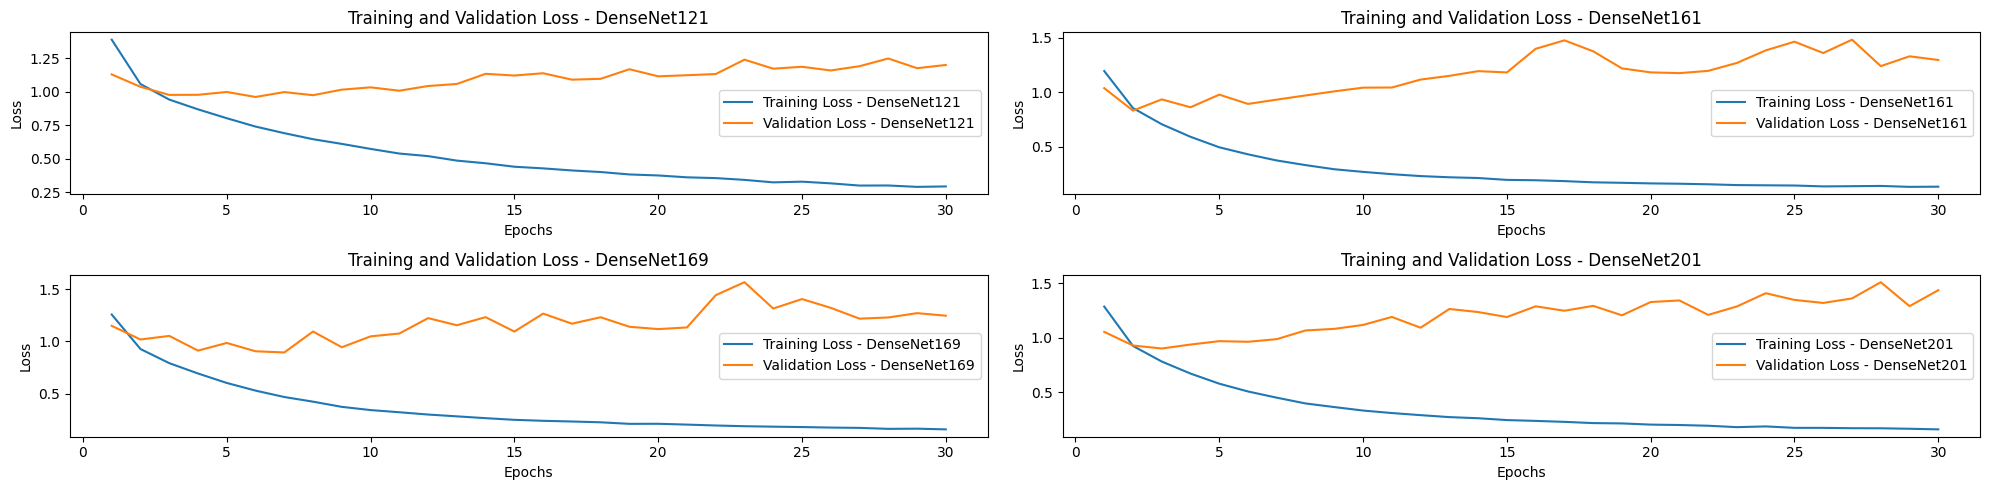

In [16]:
num_epochs = len(train_loss0)  # assuming both have the same number of epochs

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 5))

# Plot training and validation curves for DenseNet121
axes[0, 0].plot(range(1, num_epochs + 1), train_loss0, label='Training Loss - DenseNet121')
axes[0, 0].plot(range(1, num_epochs + 1), val_loss0, label='Validation Loss - DenseNet121')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Training and Validation Loss - DenseNet121')
axes[0, 0].legend()

# Plot training and validation curves for DenseNet161
axes[0, 1].plot(range(1, num_epochs + 1), train_loss1, label='Training Loss - DenseNet161')
axes[0, 1].plot(range(1, num_epochs + 1), val_loss1, label='Validation Loss - DenseNet161')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].set_title('Training and Validation Loss - DenseNet161')
axes[0, 1].legend()

# Plot training and validation curves for DenseNet169
axes[1, 0].plot(range(1, num_epochs + 1), train_loss2, label='Training Loss - DenseNet169')
axes[1, 0].plot(range(1, num_epochs + 1), val_loss2, label='Validation Loss - DenseNet169')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].set_title('Training and Validation Loss - DenseNet169')
axes[1, 0].legend()

# Plot training and validation curves for DenseNet201
axes[1, 1].plot(range(1, num_epochs + 1), train_loss3, label='Training Loss - DenseNet201')
axes[1, 1].plot(range(1, num_epochs + 1), val_loss3, label='Validation Loss - DenseNet201')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].set_title('Training and Validation Loss - DenseNet201')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

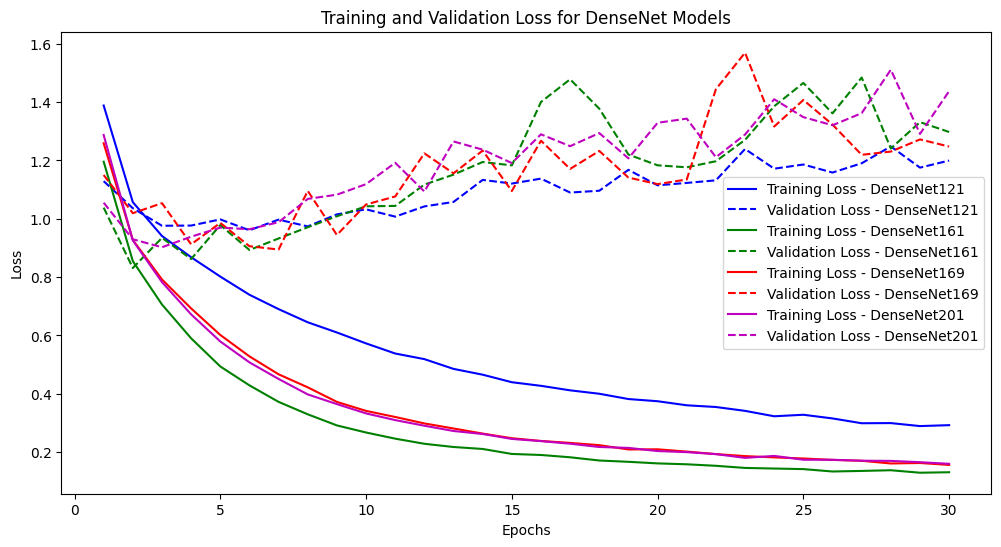

In [17]:
import matplotlib.pyplot as plt

# Number of epochs
num_epochs = len(train_loss0)  # assuming all have the same number of epochs

# Create a single plot
plt.figure(figsize=(12, 6))

# Plot training and validation curves for DenseNet121
plt.plot(range(1, num_epochs + 1), train_loss0, label='Training Loss - DenseNet121', color='b')
plt.plot(range(1, num_epochs + 1), val_loss0, label='Validation Loss - DenseNet121', linestyle='--', color='b')

# Plot training and validation curves for DenseNet161
plt.plot(range(1, num_epochs + 1), train_loss1, label='Training Loss - DenseNet161', color='g')
plt.plot(range(1, num_epochs + 1), val_loss1, label='Validation Loss - DenseNet161', linestyle='--', color='g')

# Plot training and validation curves for DenseNet169
plt.plot(range(1, num_epochs + 1), train_loss2, label='Training Loss - DenseNet169', color='r')
plt.plot(range(1, num_epochs + 1), val_loss2, label='Validation Loss - DenseNet169', linestyle='--', color='r')

# Plot training and validation curves for DenseNet201
plt.plot(range(1, num_epochs + 1), train_loss3, label='Training Loss - DenseNet201', color='m')
plt.plot(range(1, num_epochs + 1), val_loss3, label='Validation Loss - DenseNet201', linestyle='--', color='m')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for DenseNet Models')
plt.legend()

# Show the plot
plt.show()

## Accuracy Curves

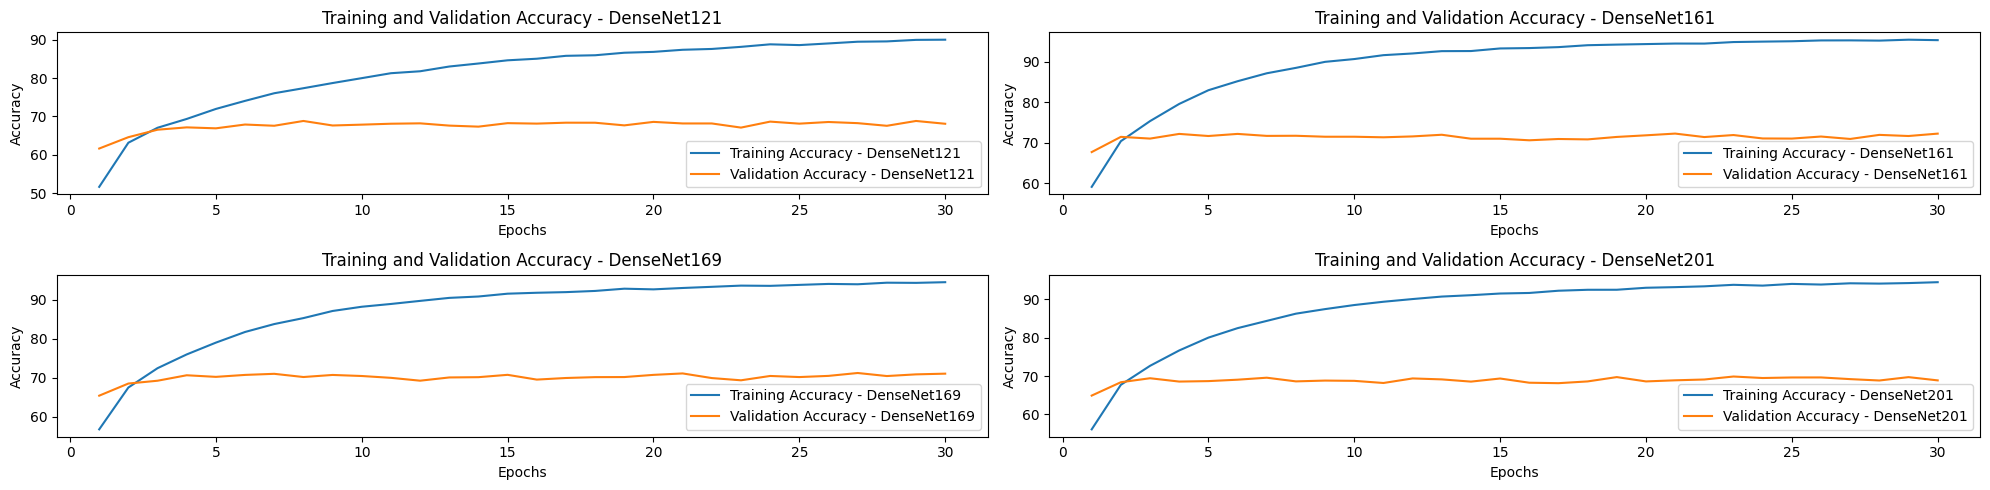

In [18]:
num_epochs = len(train_acc0)  # assuming both have the same number of epochs

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 5))

# Plot training and validation curves for DenseNet121
axes[0, 0].plot(range(1, num_epochs + 1), train_acc0, label='Training Accuracy - DenseNet121')
axes[0, 0].plot(range(1, num_epochs + 1), val_acc0, label='Validation Accuracy - DenseNet121')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Training and Validation Accuracy - DenseNet121')
axes[0, 0].legend()

# Plot training and validation curves for DenseNet161
axes[0, 1].plot(range(1, num_epochs + 1), train_acc1, label='Training Accuracy - DenseNet161')
axes[0, 1].plot(range(1, num_epochs + 1), val_acc1, label='Validation Accuracy - DenseNet161')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Training and Validation Accuracy - DenseNet161')
axes[0, 1].legend()

# Plot training and validation curves for DenseNet169
axes[1, 0].plot(range(1, num_epochs + 1), train_acc2, label='Training Accuracy - DenseNet169')
axes[1, 0].plot(range(1, num_epochs + 1), val_acc2, label='Validation Accuracy - DenseNet169')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_title('Training and Validation Accuracy - DenseNet169')
axes[1, 0].legend()

# Plot training and validation curves for DenseNet201
axes[1, 1].plot(range(1, num_epochs + 1), train_acc3, label='Training Accuracy - DenseNet201')
axes[1, 1].plot(range(1, num_epochs + 1), val_acc3, label='Validation Accuracy - DenseNet201')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Training and Validation Accuracy - DenseNet201')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

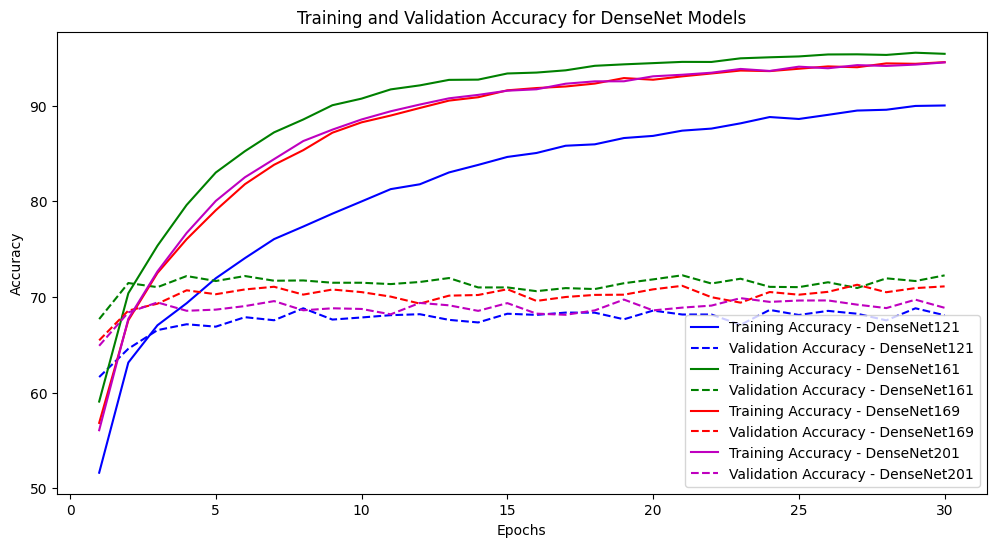

In [19]:
import matplotlib.pyplot as plt

# Number of epochs
num_epochs = len(train_acc0)  # assuming all have the same number of epochs

# Create a single plot
plt.figure(figsize=(12, 6))

# Plot training and validation curves for DenseNet121
plt.plot(range(1, num_epochs + 1), train_acc0, label='Training Accuracy - DenseNet121', color='b')
plt.plot(range(1, num_epochs + 1), val_acc0, label='Validation Accuracy - DenseNet121', linestyle='--', color='b')

# Plot training and validation curves for DenseNet161
plt.plot(range(1, num_epochs + 1), train_acc1, label='Training Accuracy - DenseNet161', color='g')
plt.plot(range(1, num_epochs + 1), val_acc1, label='Validation Accuracy - DenseNet161', linestyle='--', color='g')

# Plot training and validation curves for DenseNet169
plt.plot(range(1, num_epochs + 1), train_acc2, label='Training Accuracy - DenseNet169', color='r')
plt.plot(range(1, num_epochs + 1), val_acc2, label='Validation Accuracy - DenseNet169', linestyle='--', color='r')

# Plot training and validation curves for DenseNet201
plt.plot(range(1, num_epochs + 1), train_acc3, label='Training Accuracy - DenseNet201', color='m')
plt.plot(range(1, num_epochs + 1), val_acc3, label='Validation Accuracy - DenseNet201', linestyle='--', color='m')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for DenseNet Models')
plt.legend()

# Show the plot
plt.show()